## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

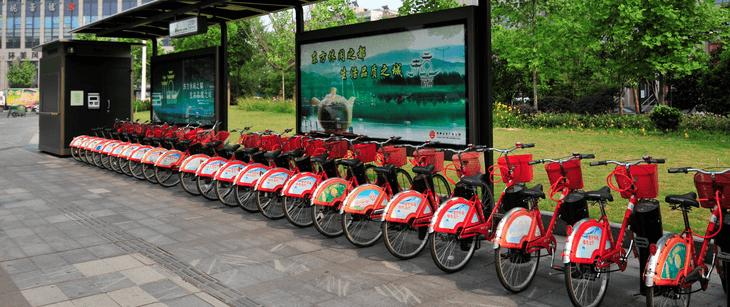

#INITIALIZING DATA

In [72]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [73]:
# URL for the Data stored in CSV
url = 'https://drive.google.com/uc?export=download&id=1G6V1nWS4BKMzvYIZZ7sWUTSuJAs1WLxI'

# Importing dataset to create a dataframe
df = pd.read_csv(url,encoding = 'latin',parse_dates=['Date'])

In [74]:
#Dataframe Shape
print('Shape of the dataset: ', df.shape)

Shape of the dataset:  (8760, 14)


In [75]:
#First 5 rows in the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [76]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [77]:
#Data Description of Numerical Columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [78]:
#Checking for missing values in the dataframe
print('Missing value count with respect to each column:')
df.isna().sum()

Missing value count with respect to each column:


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Our dataset does not contain any missing values :)

In [79]:
#Checking for duplicate rows in the dataframe
print(len(df[df.duplicated()]))

0


Our dataset contains only unique rows :)

#EXPLORATORY DATA ANALYSIS AND FEATURE MANIPULATION

Let's first analyse our dependant variable ('Rented Bike Count')

In [80]:
dep_var = df['Rented Bike Count']

In [81]:
#Calculating Skewness of the dependent Variable
print(f'Skewness of original data : ', dep_var.skew())
print(f'Skewness after transformation : ', np.sqrt(dep_var).skew())

Skewness of original data :  1.1534281773679014
Skewness after transformation :  0.237362090985412


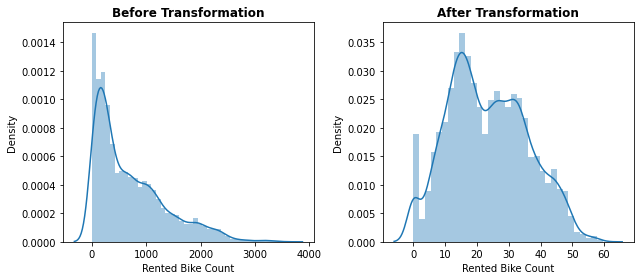

In [82]:
#Plotting distribution before and after Transformation
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['Rented Bike Count']).set_title('Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented Bike Count'])).set_title('After Transformation',weight='bold')
plt.tight_layout();

Let's now analyse our Independant Variables

Exploring at Numerical Features

In [83]:
#Getting Numerical Columns from the data
numeric_features = df.describe().columns

numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

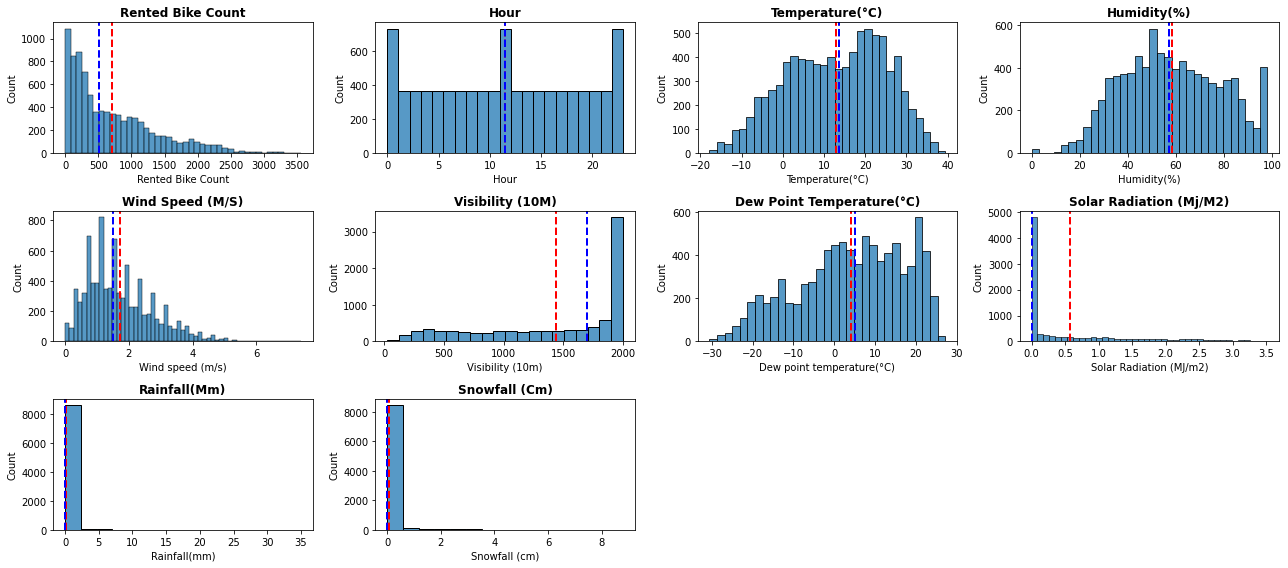

In [84]:
plt.figure(figsize=(18,8))
for n,column in enumerate(numeric_features):
  feature = df[column]
  ax=plt.subplot(3, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

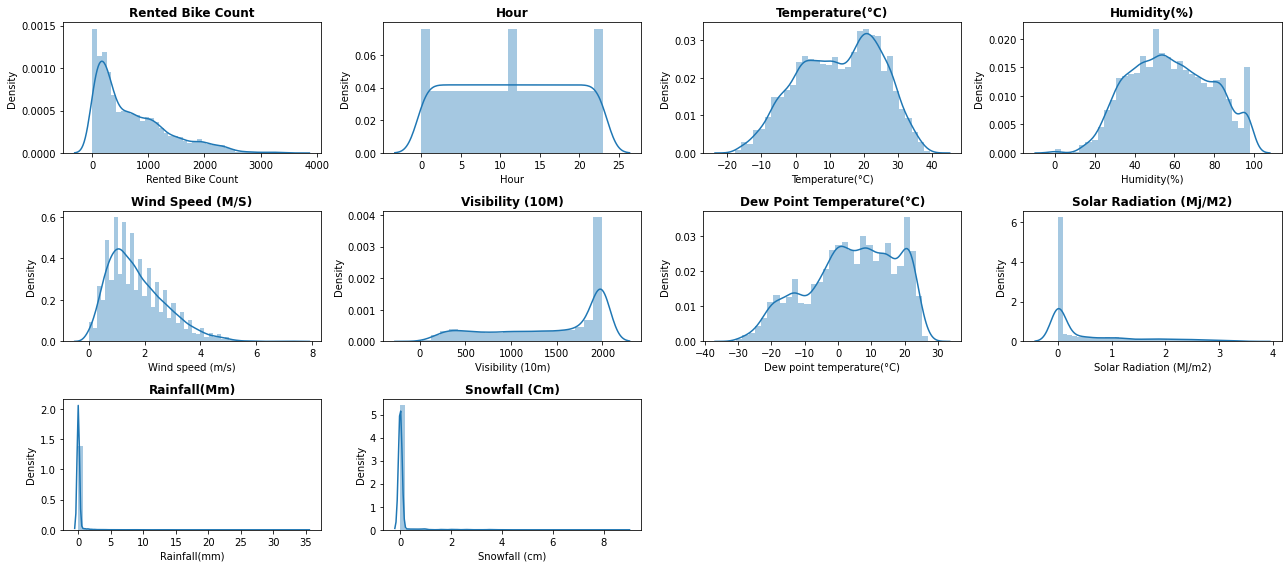

In [85]:
# Visualizing the distributions.
plt.figure(figsize=(18,8))
for n,column in enumerate(numeric_features):
  plt.subplot(3, 4, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Checking for outliers

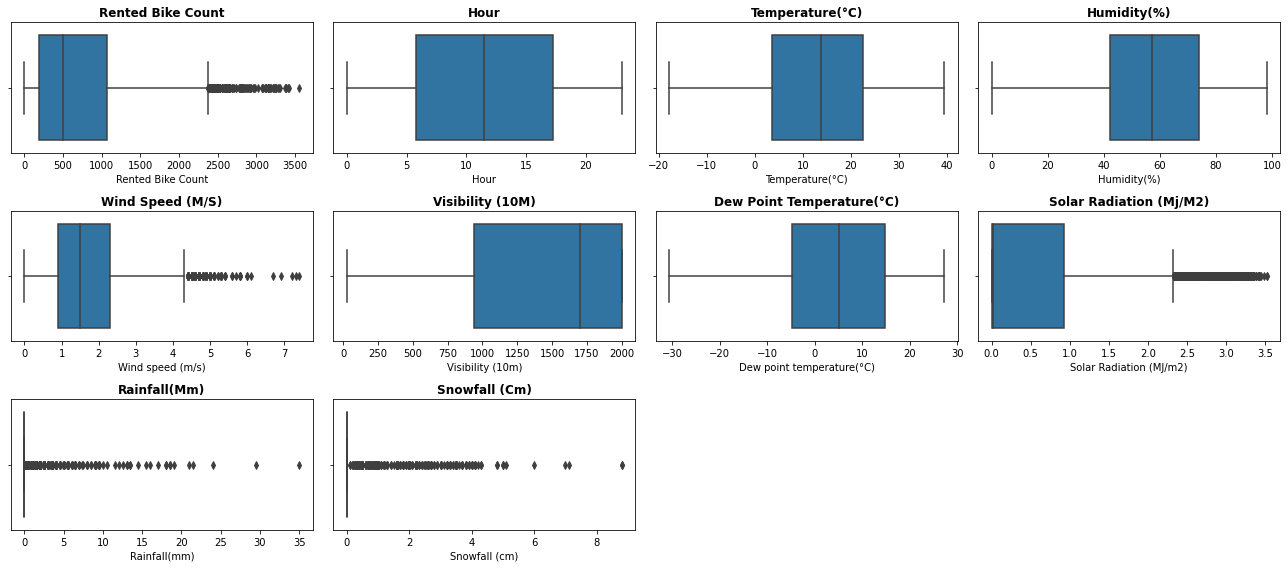

In [86]:
# Checking for outliers
plt.figure(figsize=(18,8))
for n,column in enumerate(numeric_features):
  plt.subplot(3, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Let's remove outliers from skewed features

In [87]:
#Using IQR
q1, q3, median = df['Rented Bike Count'].quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Rented Bike Count'] = np.where(df['Rented Bike Count'] > upper_limit, median,np.where(
                            df['Rented Bike Count'] < lower_limit,median,df['Rented Bike Count']))

#Capping extreme values
for col in ['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

##Feature Engineering

Exploring Catagorical Features

In [88]:
# Extracting new features from Data and Hour column
df['Is_Weekend'] = df['Date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['Time_of_the_Day'] = df['Hour'].apply(lambda x: 'night' if 21<=x<=23 or 0<=x<=5 else ('morning' if 5<=x<=12 else ('afternoon' if 12<=x<=17 else 'evening')))


# Dropping the Date column
df.drop(columns=['Date'], inplace = True)

In [89]:
#Getting Catagorical Columns from the data
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'Time_of_the_Day']

In [90]:
#Getting count of all values from each feature variable
[print(f'{i}: \n {df[i].value_counts()} \n') for i in categorical_features]

Seasons: 
 Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Holiday: 
 No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Functioning Day: 
 Yes    8465
No      295
Name: Functioning Day, dtype: int64 

Time_of_the_Day: 
 night        3285
morning      2555
afternoon    1825
evening      1095
Name: Time_of_the_Day, dtype: int64 



[None, None, None, None]

We will perform Label Encoding on the features 'Holiday', 'Functioning Day', 'Time_of_the_Day' and One Hot Encoding on the 'Seasons' feature

In [91]:
# Defining a label encoder based on above data
encoder = {'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0},
          'Time_of_the_Day': {'night':0, 'morning':1, 'afternoon':2, 'evening':3}}

# Label Encoding
df = df.replace(encoder)

# One Hot Encoding
df = pd.get_dummies(df, columns=["Seasons"], prefix='', prefix_sep='')

Our Dataframe will look like this:

In [92]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Is_Weekend,Time_of_the_Day,Autumn,Spring,Summer,Winter
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Is_Weekend                 8760 non-null   int64  
 13  Time_of_the_Day            8760 non-null   int64

Relationship between our Target Variable ('Rented Bike Count') with other features

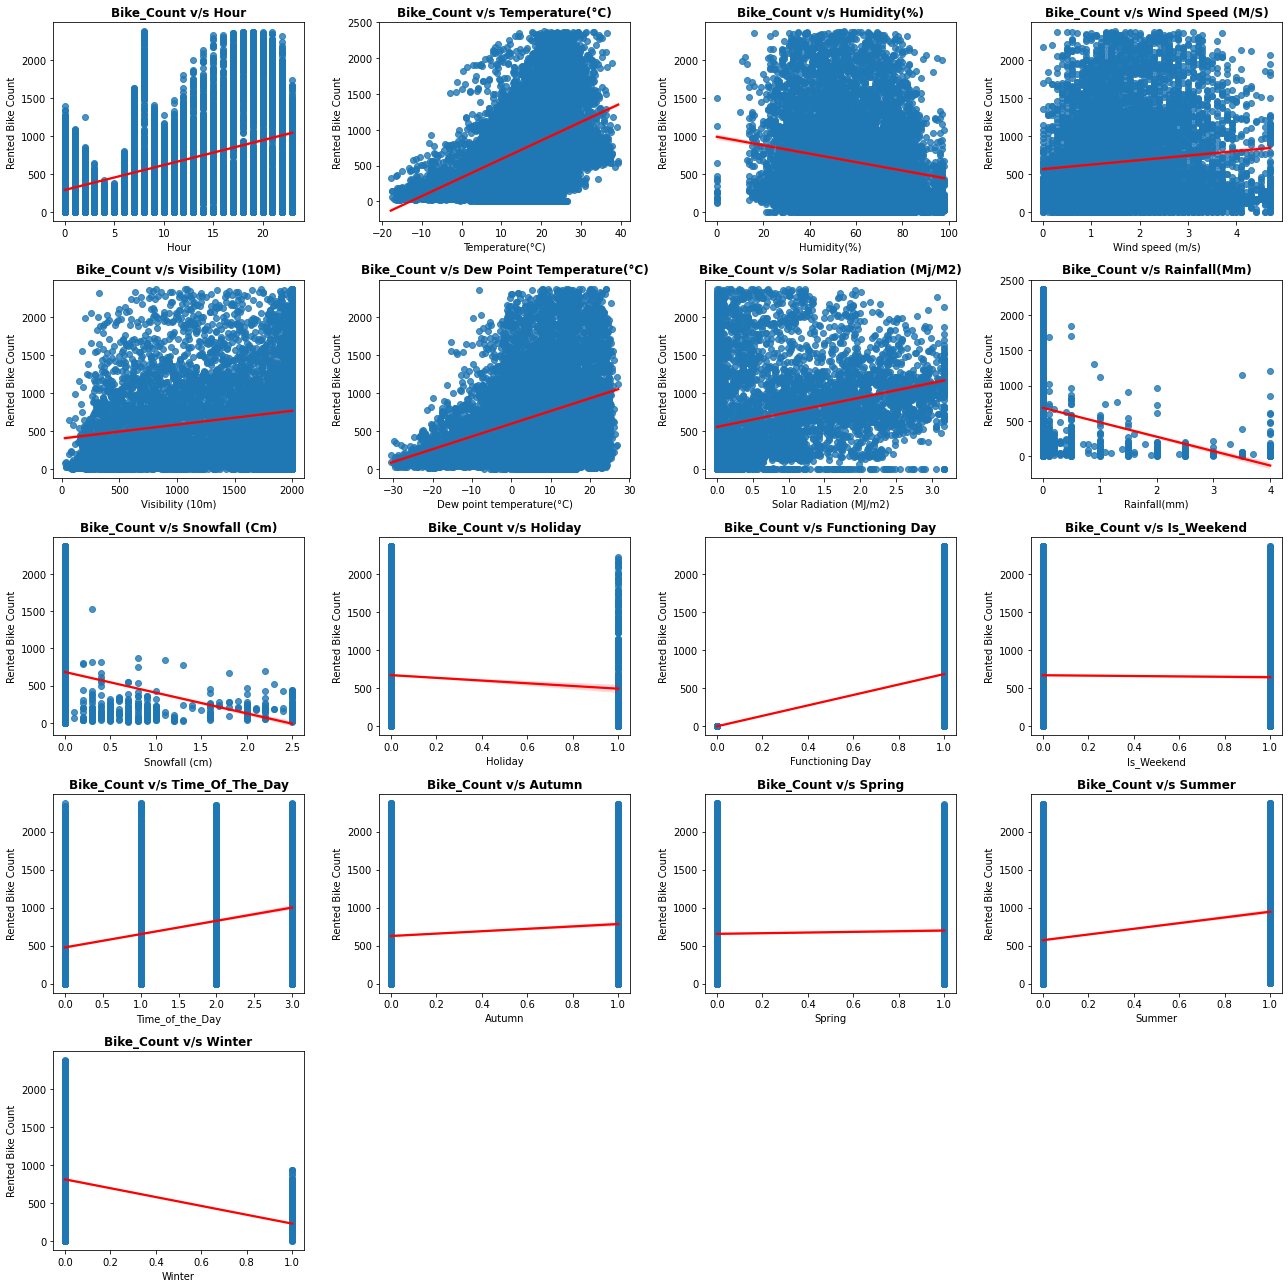

In [94]:
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]


plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df, x = column, y ='Rented Bike Count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

Checking for multicollinearity between features

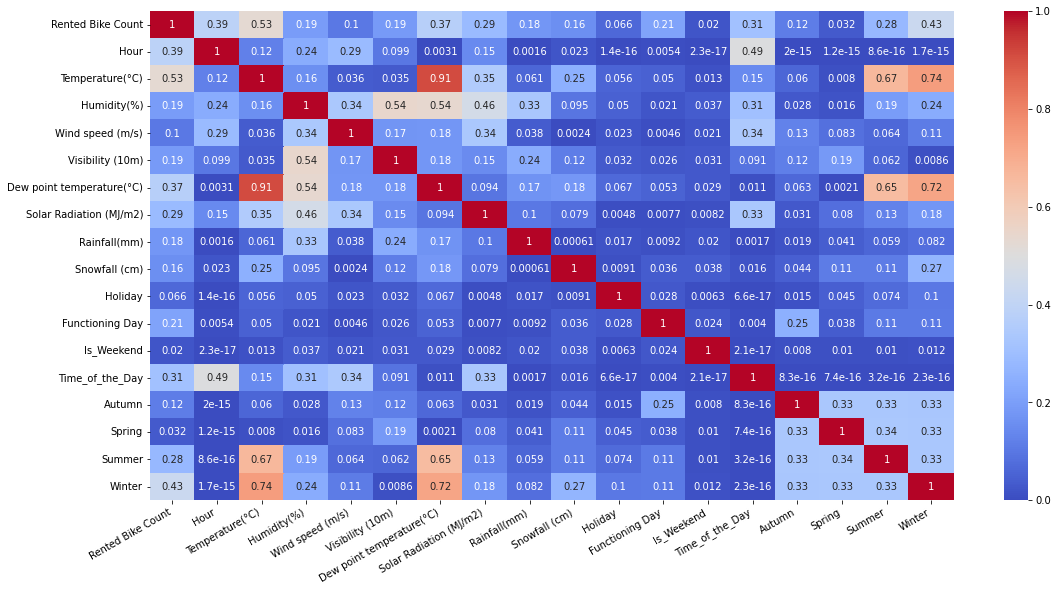

In [95]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

We can check VIF for different features and get rid of some features to tackle multicollinearity

In [96]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [97]:
calc_vif(df[independent_variables])

,variables,VIF
0,Dew point temperature(°C),119.367200
1,Summer,116.234255
2,Spring,112.702272
3,Autumn,110.724879
4,Winter,107.816649
5,Temperature(°C),91.301854
6,Humidity(%),21.160330
7,Solar Radiation (MJ/m2),2.060108
8,Visibility (10m),1.699089
9,Time_of_the_Day,1.551670


Removing Features with high VIF

In [98]:
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Summer','Winter','Humidity(%)']]
calc_vif(df[independent_variables])

,variables,VIF
0,Functioning Day,9.244753
1,Visibility (10m),6.921214
2,Hour,5.090997
3,Wind speed (m/s),4.976719
4,Time_of_the_Day,3.136238
5,Temperature(°C),2.692101
6,Solar Radiation (MJ/m2),2.041488
7,Spring,1.530706
8,Autumn,1.472605
9,Is_Weekend,1.396353


Let's update our dataset with optimal features and start modelling

In [99]:
data = df[independent_variables + ['Rented Bike Count']]
data.head()

,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Is_Weekend,Time_of_the_Day,Autumn,Spring,Rented Bike Count
0,0,-5.2,2.2,2000,0.0,0.0,0.0,0,1,0,0,0,0,254.0
1,1,-5.5,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,204.0
2,2,-6.0,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,173.0
3,3,-6.2,0.9,2000,0.0,0.0,0.0,0,1,0,0,0,0,107.0
4,4,-6.0,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,0,78.0


Correlation Heatmap for updated dataset

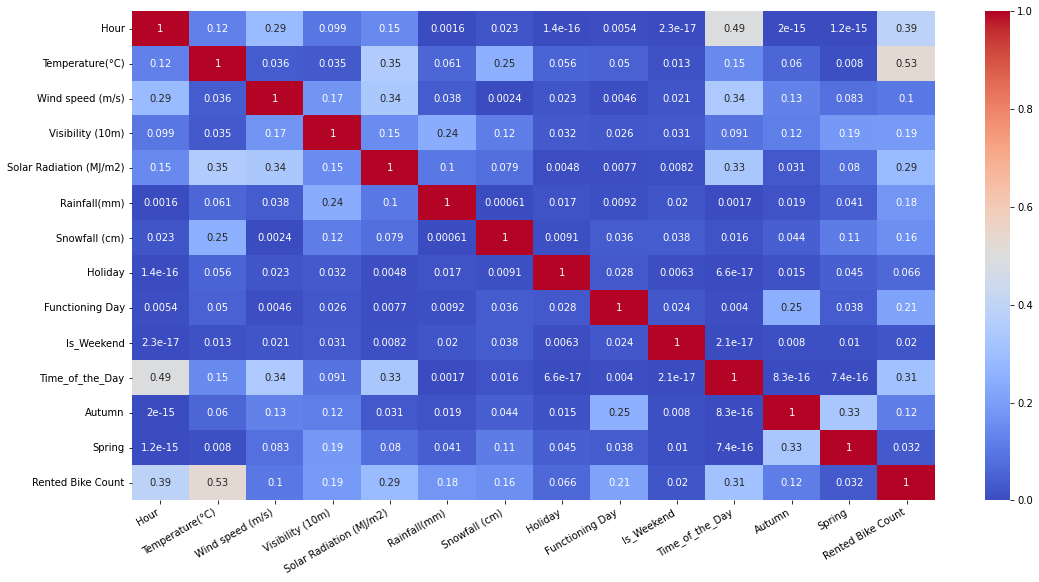

In [100]:
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(data.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

Checking Relationship between Target Variable ('Rented Bike Count') and Independant Features from the updated dataset

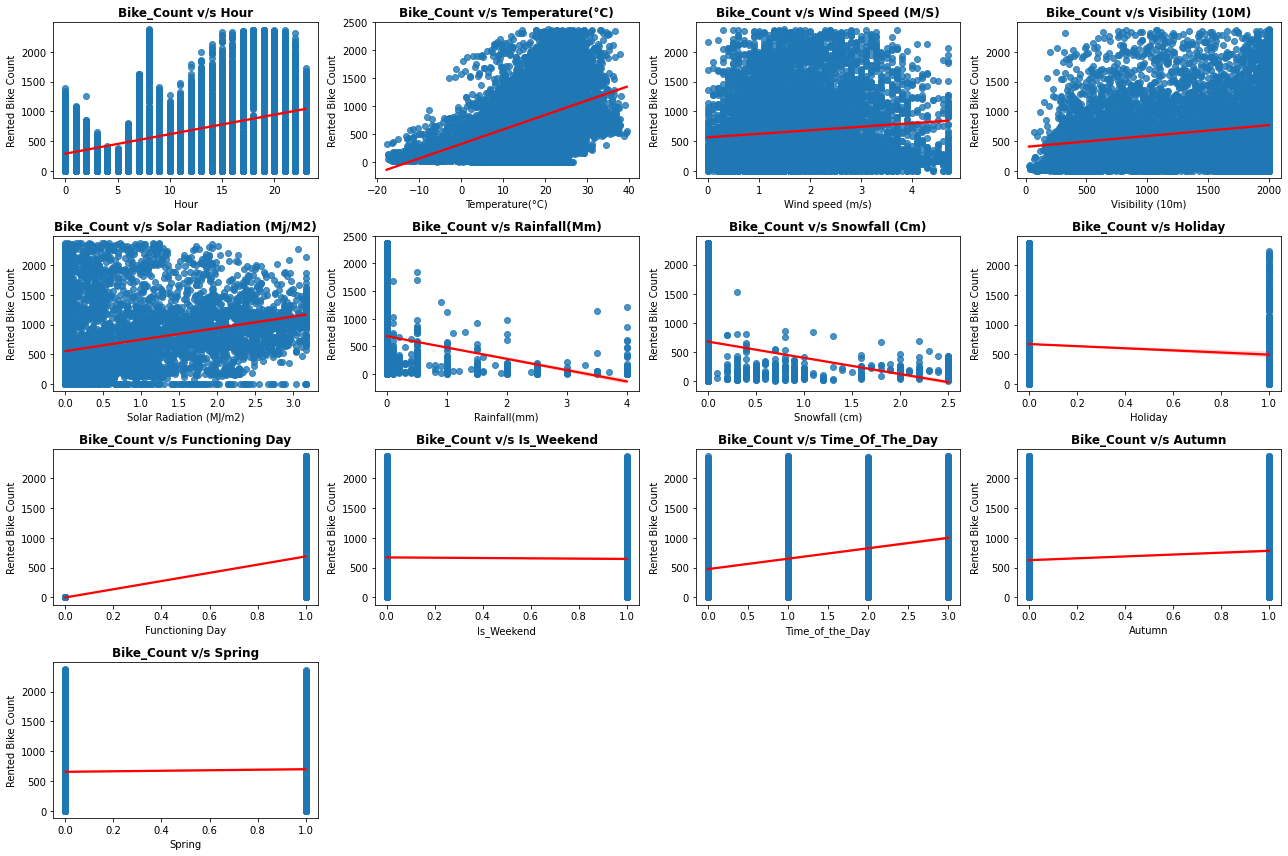

In [101]:
#Making a list of independant variables 
ind_var = [i for i in data.columns if i not in ['Rented Bike Count']]

#Plotting Linearity
plt.figure(figsize=(18,12))
for n,column in enumerate(ind_var):
  plt.subplot(4, 4, n+1)
  sns.regplot(data = data, x = column, y ='Rented Bike Count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

#MODEL BUILDING

##Preprocessing

Defining Features(X) and Target(y)

In [102]:
#X is a dataframe with all independant features
X = data[ind_var]

#y denotes the target variable
y = np.sqrt(data['Rented Bike Count'])

Train-Test Split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Feature Scaling

In [104]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
#Evaluation metrics list for all models
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [125]:
# Defining a function to train the input model and print evaluation metrics
features = [i for i in data.columns if i not in ['Rented Bike Count']]

def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p = y_test**2,y_pred**2

  # Calculating Evaluation Matrix
  mse = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  r2 = r2_score(a,p)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("R2 :" ,r2)
  print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

In [106]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [6,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

## MODEL SELECTION

###LINEAR REGRESSION

MSE : 154475.3530565927
RMSE : 393.03352663175275
R2 : 0.5330706381474334
Adjusted R2 :  0.5295780709989389


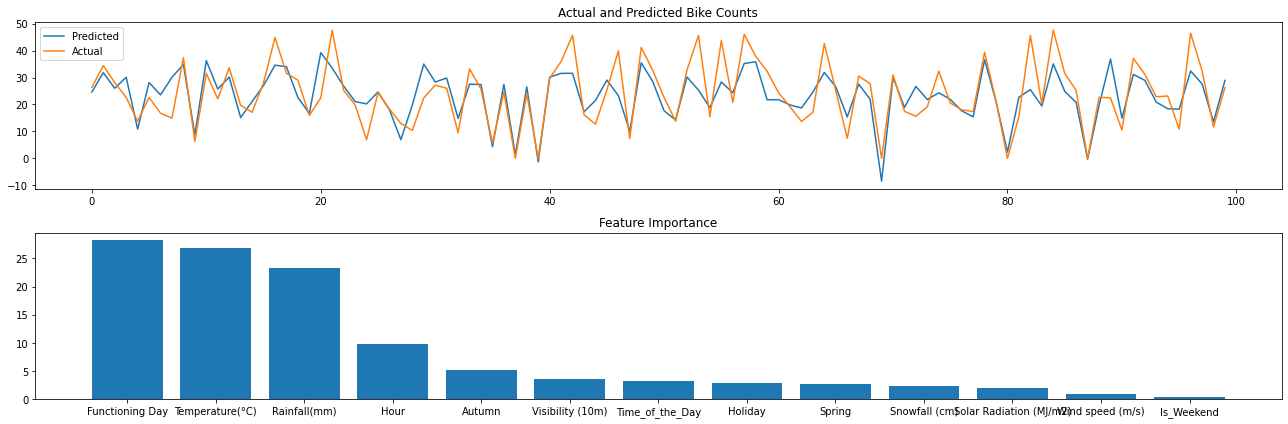

LinearRegression()

In [107]:
# Fitting Linear Regression Model
lr = LinearRegression()
analyse_model(lr, X_train, X_test, y_train, y_test)

### TREE BASED MODELS

####DECISION TREES

MSE : 101666.27544677362
RMSE : 318.85149434615107
R2 : 0.6926955130576844
Adjusted R2 :  0.6903969179309581


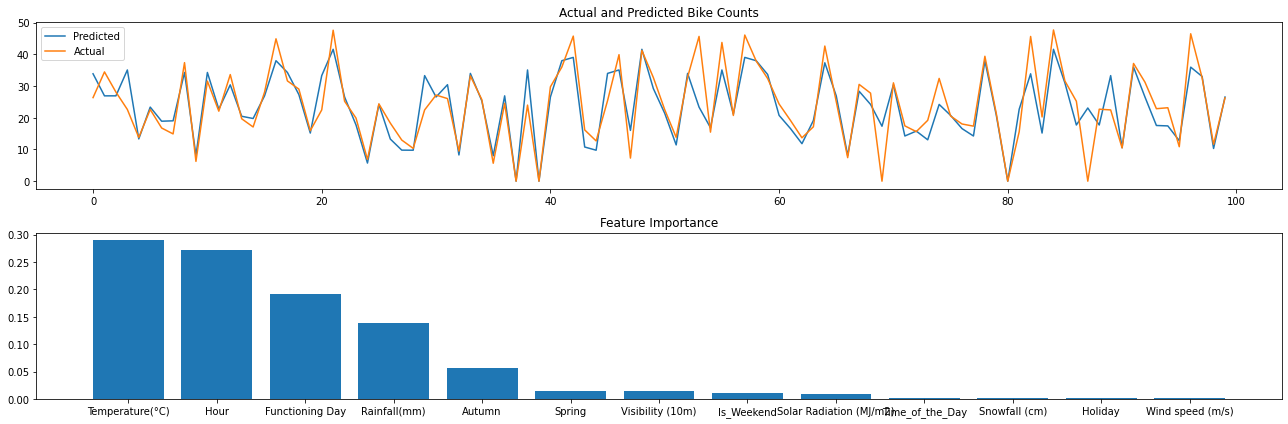

DecisionTreeRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
                      random_state=1)

In [108]:
# Regressor
regressor = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dt = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
dt.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(dt.best_estimator_, X_train, X_test, y_train, y_test)

####RANDOM FOREST 

MSE : 91279.56266322175
RMSE : 302.12507784561967
R2 : 0.7240912087191989
Adjusted R2 :  0.7220274490605968


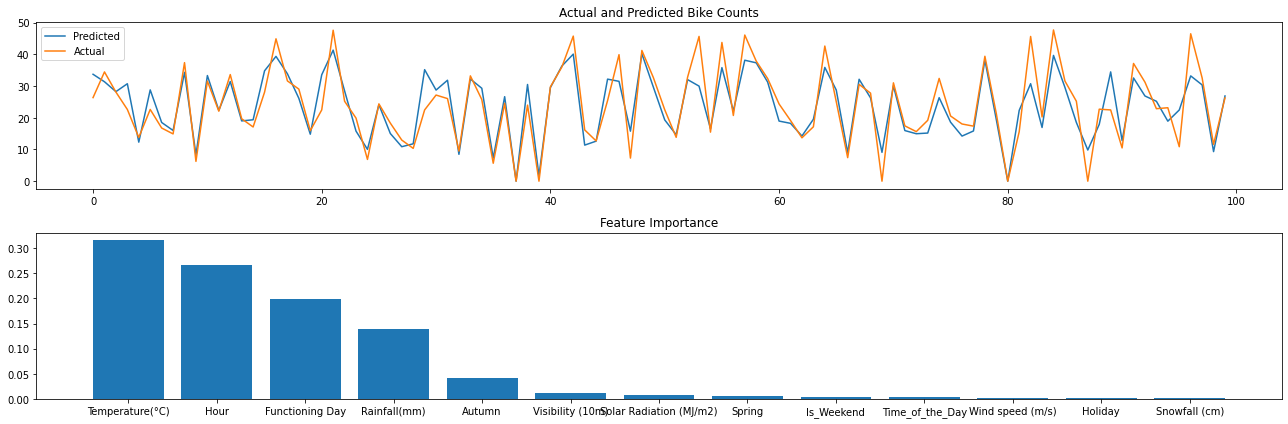

RandomForestRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=150, random_state=2)

In [109]:
# Regressor
regressor = RandomForestRegressor(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
rf = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
rf.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_train, X_test, y_train, y_test)

####XGBOOST 

MSE : 67021.63105475919
RMSE : 258.8853627665326
R2 : 0.7974151422897086
Adjusted R2 :  0.7958998355289296


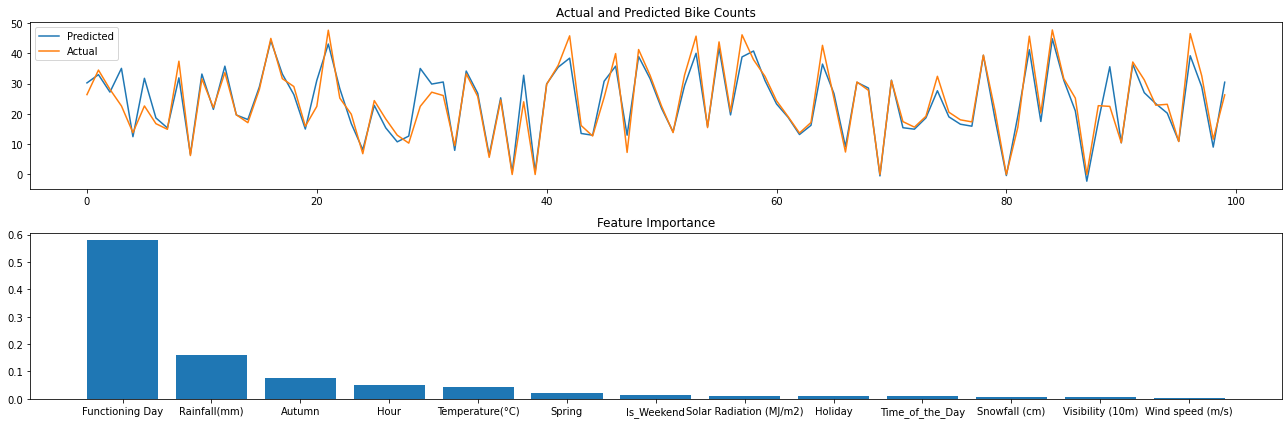

XGBRegressor(eta=0.05, max_depth=8, min_samples_leaf=40, min_samples_split=50,
             random_state=3, silent=True)

In [110]:
# Regressor
regressor = XGBRegressor(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'eta' : eta}

# GridSearch to find the best parameters
xgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
xgb.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_train, X_test, y_train, y_test)

####GRADIENT BOOSTING 

MSE : 68904.84131800423
RMSE : 262.4973167824849
R2 : 0.791722802708979
Adjusted R2 :  0.79016491803419


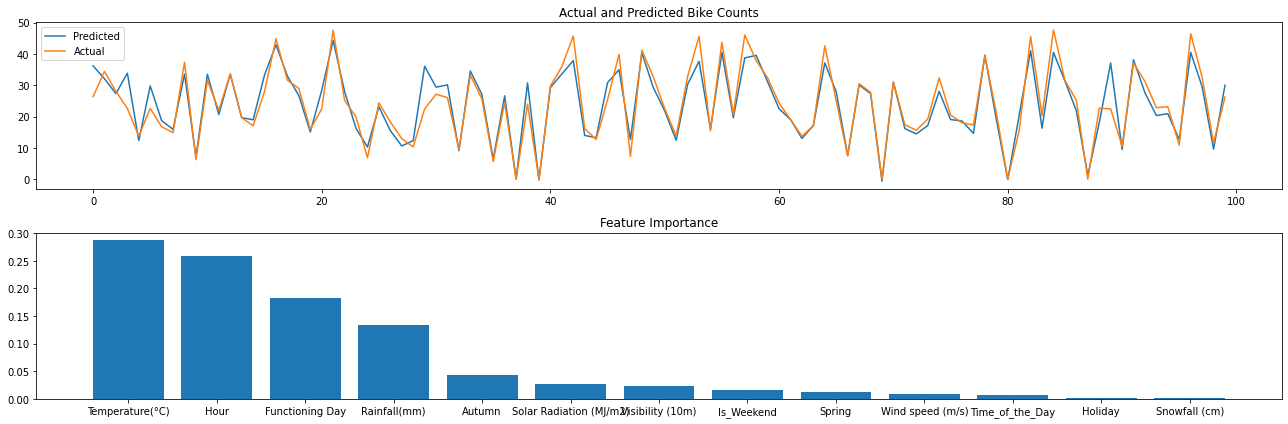

GradientBoostingRegressor(max_depth=10, min_samples_leaf=40,
                          min_samples_split=100, random_state=4)

In [111]:
# Regressor
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(gbr.best_estimator_, X_train, X_test, y_train, y_test)

####LIGHTGBM

MSE : 69110.7451247536
RMSE : 262.8892259579186
R2 : 0.7911004216547453
Adjusted R2 :  0.7895378816556151


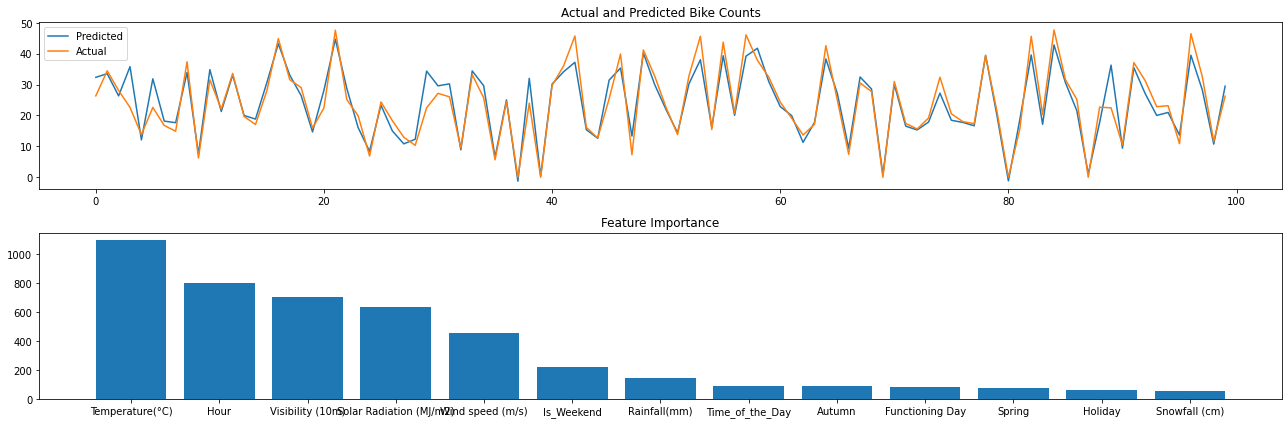

LGBMRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
              n_estimators=150, random_state=1)

In [112]:
import lightgbm as lgb

# Regressor
regressor = lgb.LGBMRegressor(random_state=1)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(gbr.best_estimator_, X_train, X_test, y_train, y_test)

####CATBOOST

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.5
0:	learn: 8.4220421	total: 49.2ms	remaining: 2.41s
1:	learn: 6.8397823	total: 52.1ms	remaining: 1.25s
2:	learn: 6.2383669	total: 54.8ms	remaining: 858ms
3:	learn: 5.9757303	total: 57.5ms	remaining: 661ms
4:	learn: 5.6346288	total: 60.2ms	remaining: 542ms
5:	learn: 5.4572592	total: 62.9ms	remaining: 461ms
6:	learn: 5.3434783	total: 65.5ms	remaining: 402ms
7:	learn: 5.2651700	total: 68.1ms	remaining: 357ms
8:	learn: 5.1107313	total: 70.7ms	remaining: 322ms
9:	learn: 5.0627991	total: 73.3ms	remaining: 293ms
10:	learn: 5.0080985	total: 75.9ms	remaining: 269ms
11:	learn: 4.9195135	total: 78.4ms	remaining: 248ms
12:	learn: 4.8860077	total: 81ms	remaining: 231ms
13:	learn: 4.8565868	total: 83.6ms	remaining: 215ms
14:	learn: 4.8173006	total: 86.2ms	remaining: 201ms
15:	learn: 4.7915748	total: 88.8ms	remaining: 189ms
16:	learn: 4.7460127	total: 91.1ms	remaining: 177ms
17:	

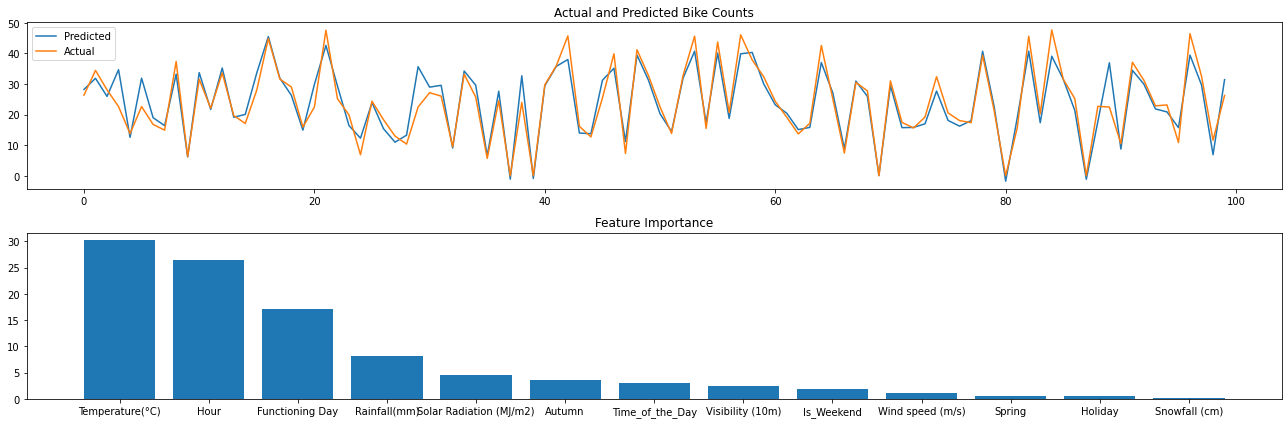

In [117]:
!pip install catboost
from catboost import CatBoostRegressor

# Regressor
regressor = CatBoostRegressor()

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(gbr.best_estimator_, X_train, X_test, y_train, y_test)

##Score matrix comparing all models

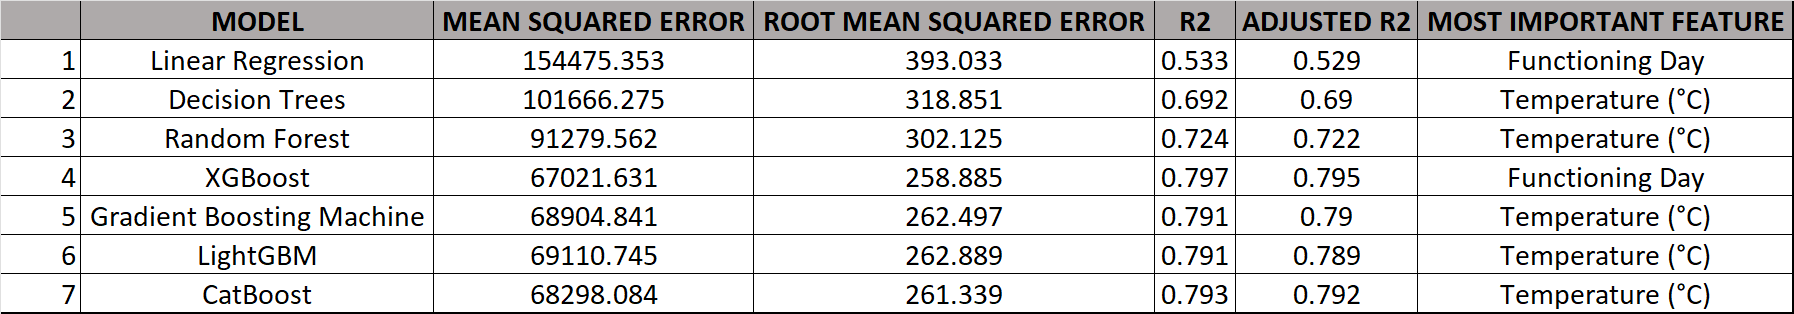

#CONCLUSION

* *Models Used:*


  1.   Linear Regression
  2.   Decision Trees
  3.   Random Forest
  4.   XGBoost
  5.   Gradient Boosting Machine
  6.   LightGBM
  7.   CatBoost

  * *Prominent Features:*
  1. **Temperature** is the most prominent feature as derived from Decision Trees, Random Forest, Gradient Boosting Machine, LightGBM, CatBoost.
  2. **Functioning Day** is the most prominent feature as derived from Linear Regression and XGBoost models.

  * *Model Performance*:
  R2 Score (Greatest to smallest)
  1. XGBoost: 0.797
  2. CatBoost: 0.793
  3. Gradient Boosting Machine: 0.791
  4. LightGBM: 0.789
  5. Random Forest : 0.724
  6. Decision Trees: 0.692
  7. Linear Regression: 0.529

  * XGBoost seems to be performing better as compared to other models and we can consider it to be the best model here for this problem statement.


